In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [19]:
def forward_pass(inputs, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    # Calculate the weighted sum of inputs for the hidden layer
    hidden_input = np.dot(weights_input_hidden, inputs) + biases_hidden
    # Apply the sigmoid activation function to the hidden layer
    hidden_output = sigmoid(hidden_input)
    # Calculate the weighted sum of inputs for the output layer
    output_input = np.dot(weights_hidden_output, hidden_output) + biases_output
    # Apply the sigmoid activation function to the output layer
    output = sigmoid(output_input)
    
    return hidden_output, output


In [20]:
def mean_squared_error(targets, outputs):
    return 0.5 * np.mean((targets - outputs)**2)

In [21]:
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

input_size = 1
hidden_size = 5
output_size = 1
learning_rate = 0.01

weights_input_hidden = np.random.randn(hidden_size, input_size)
biases_hidden = np.zeros((hidden_size, 1))
weights_hidden_output = np.random.randn(output_size, hidden_size)
biases_output = np.zeros((output_size, 1))

In [22]:
weights_input_hidden

array([[ 0.82044438],
       [-0.97277405],
       [ 0.57014259],
       [ 0.07772909],
       [ 0.46553287]])

In [23]:
weights_hidden_output

array([[-0.18104534, -0.88202163,  0.20343711,  0.79190569,  0.43866299]])

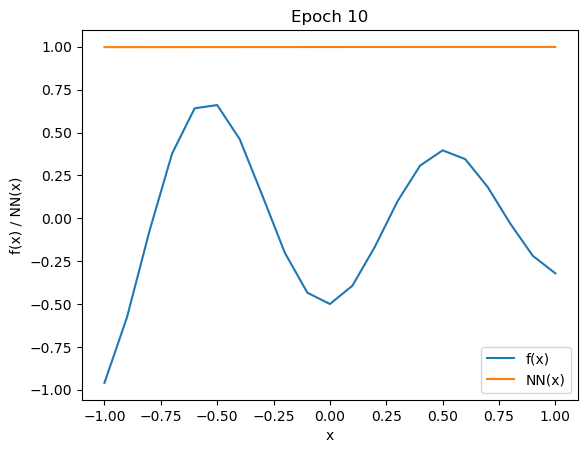

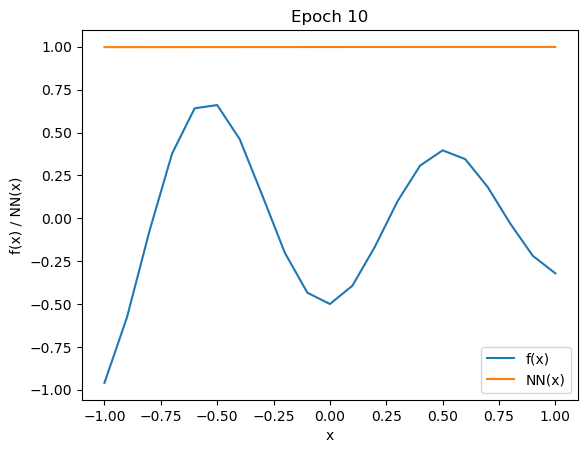

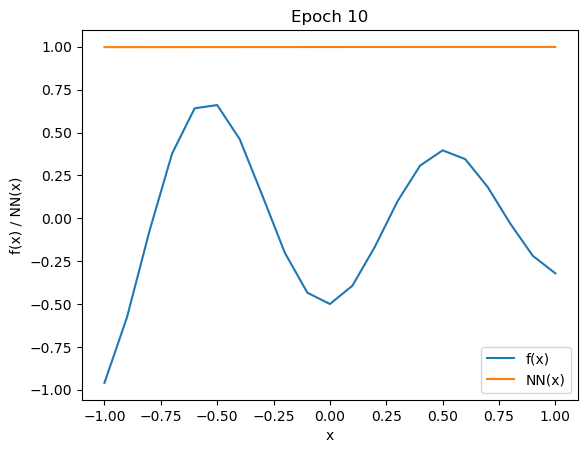

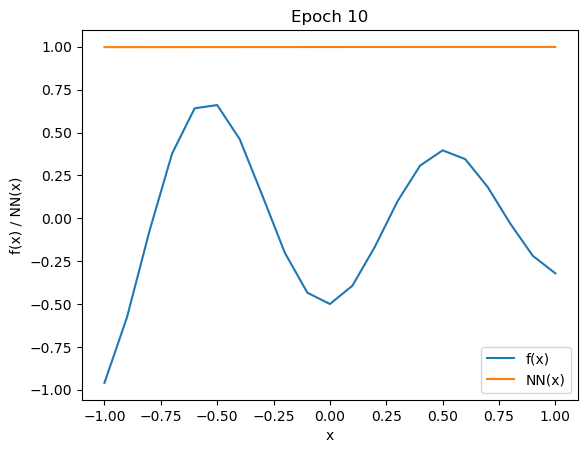

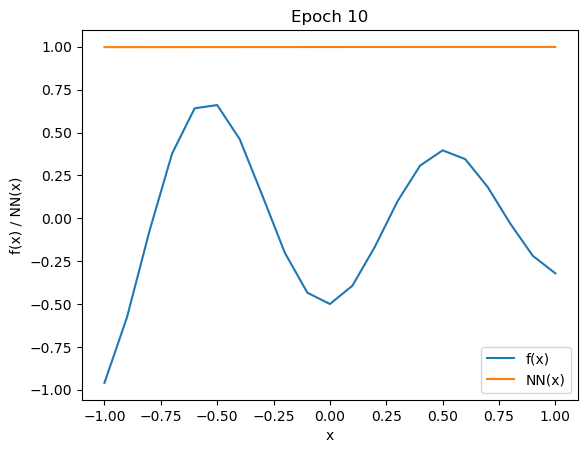

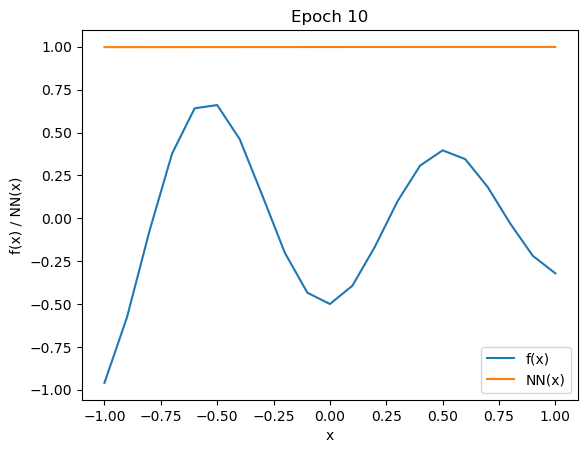

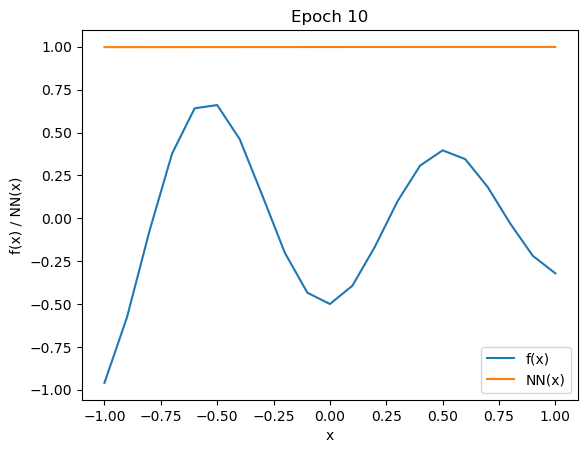

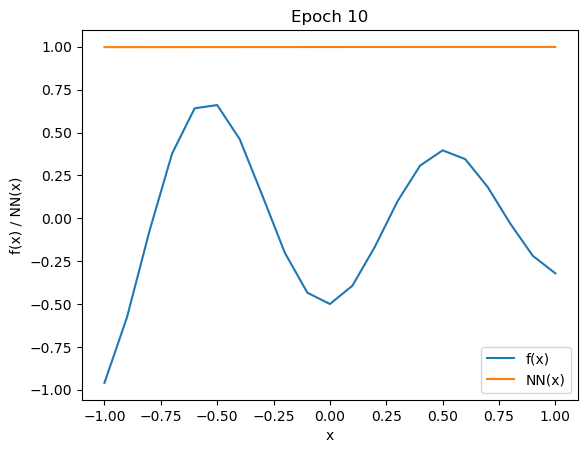

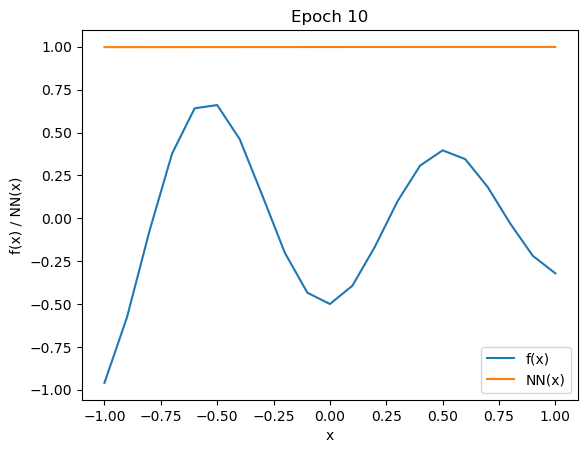

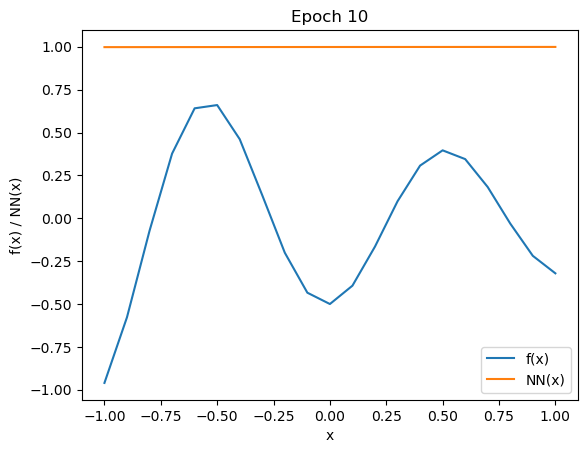

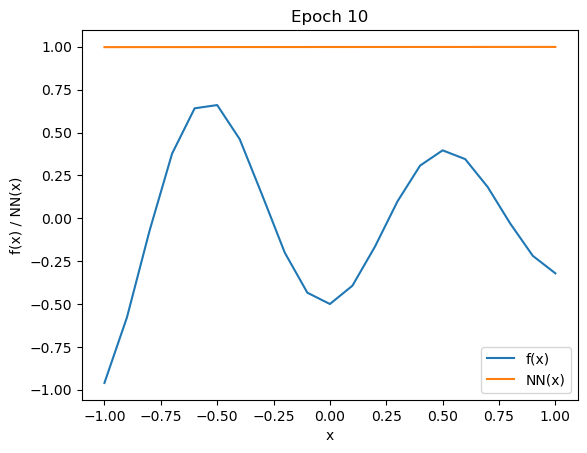

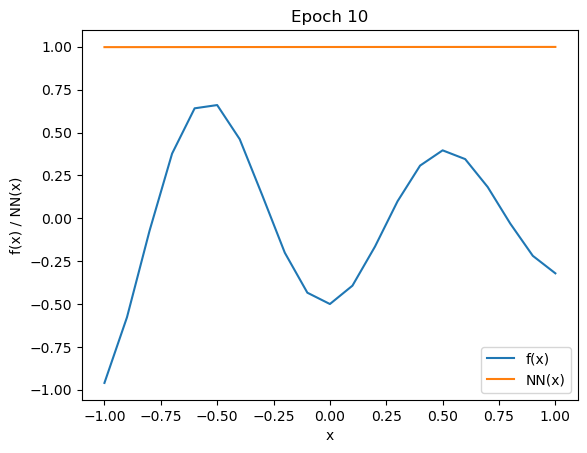

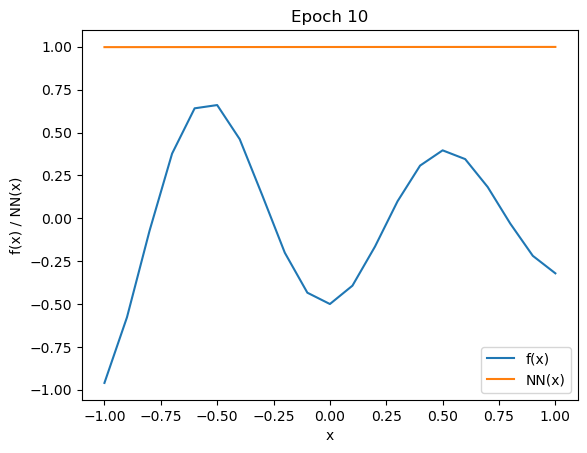

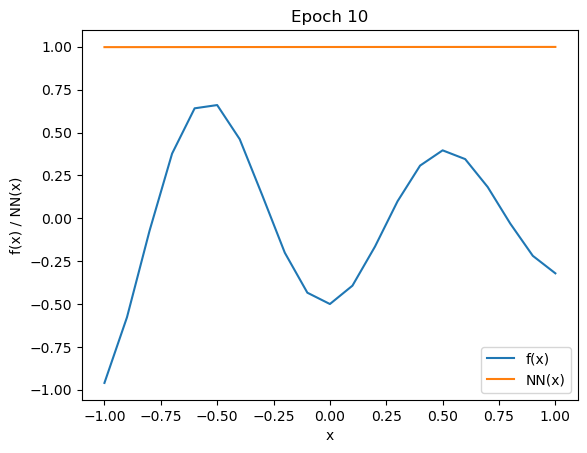

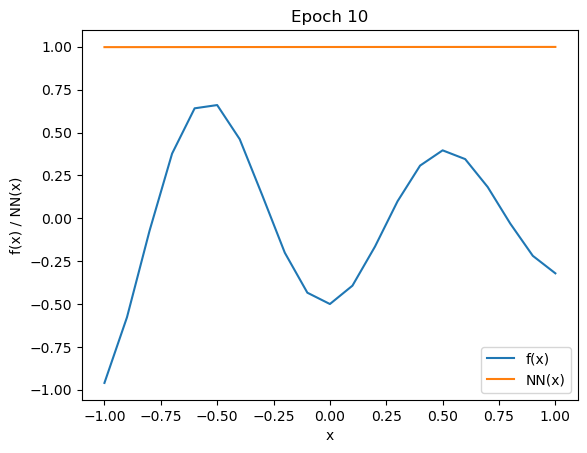

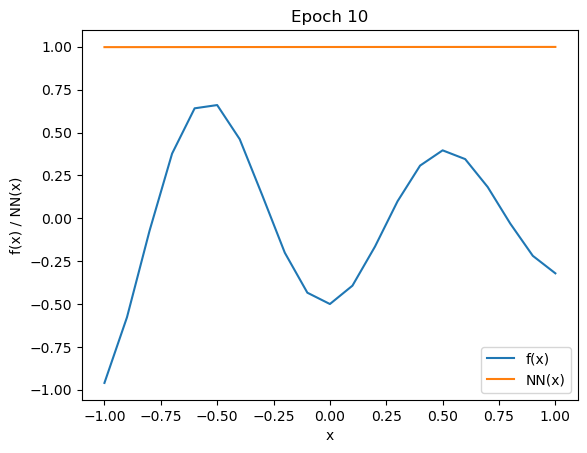

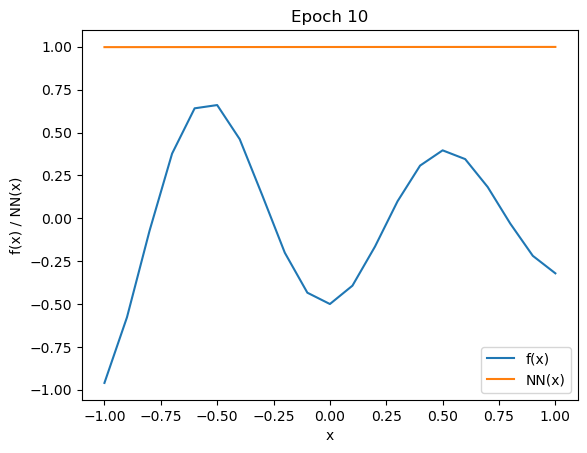

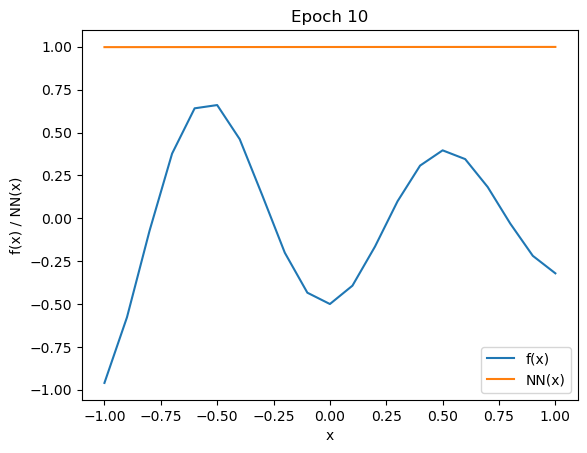

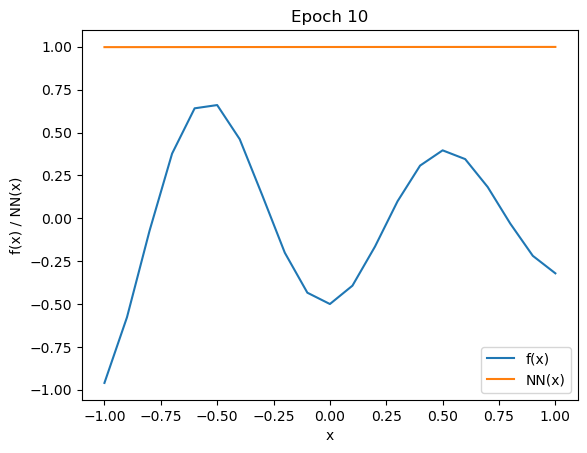

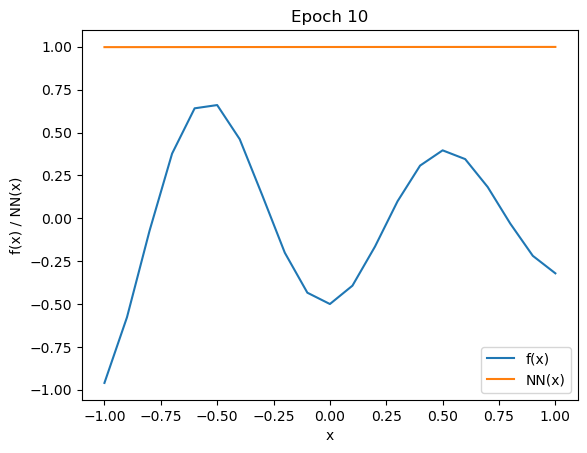

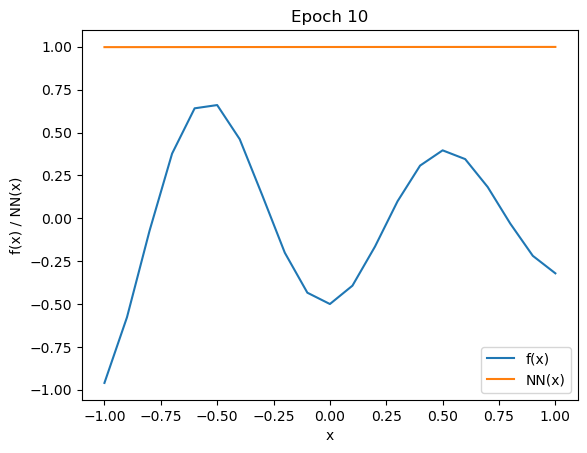

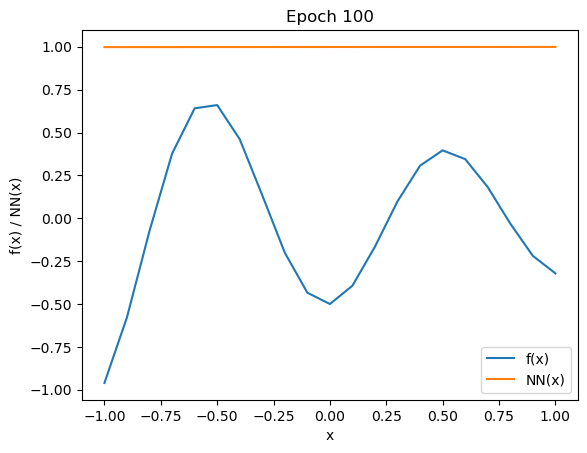

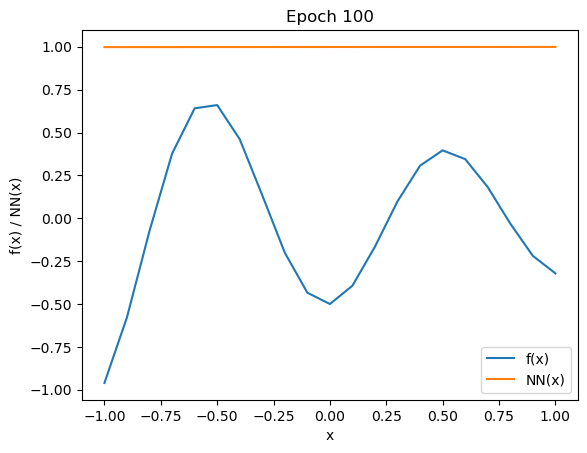

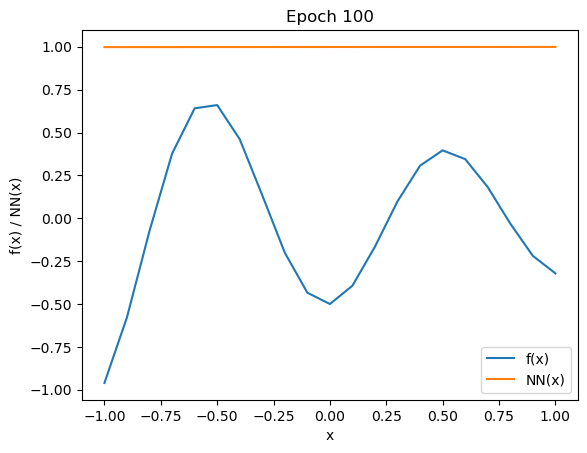

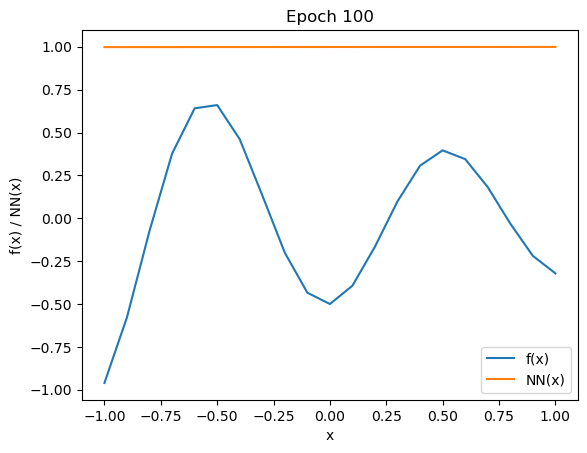

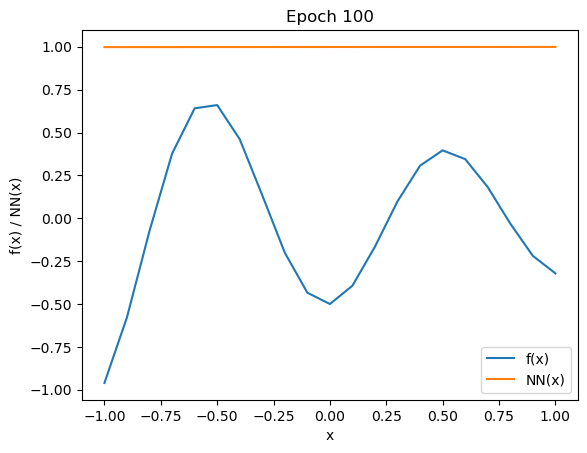

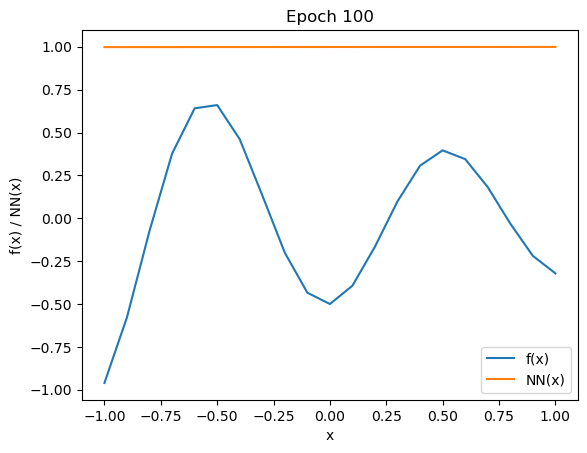

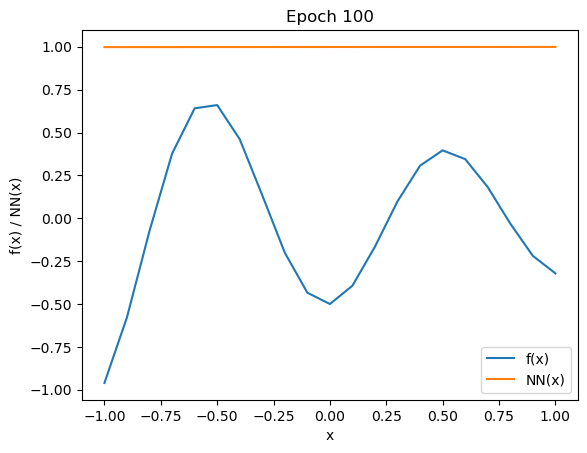

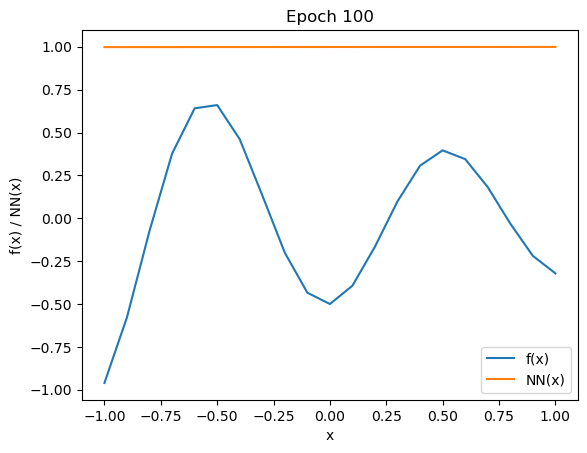

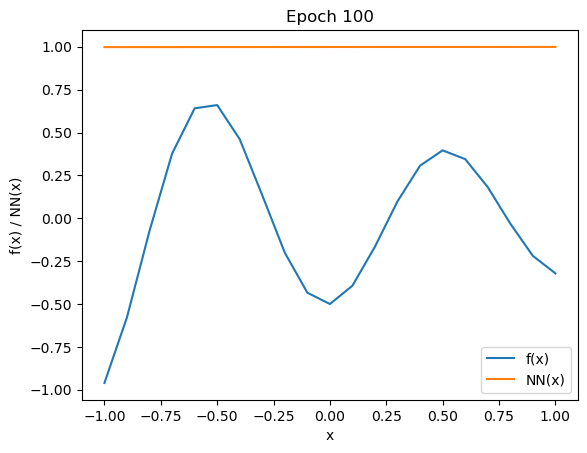

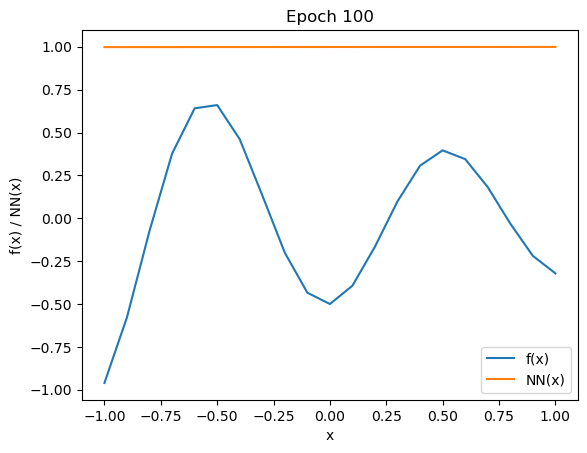

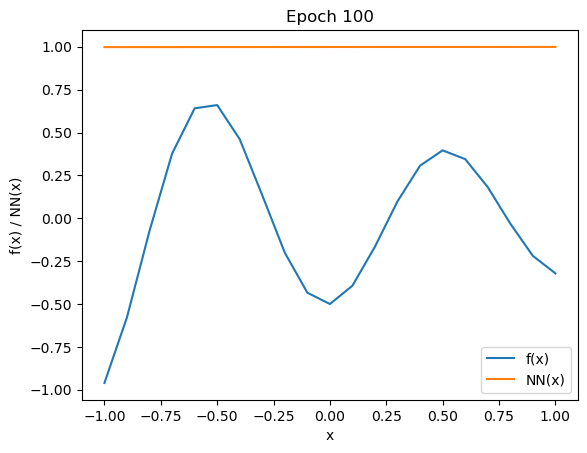

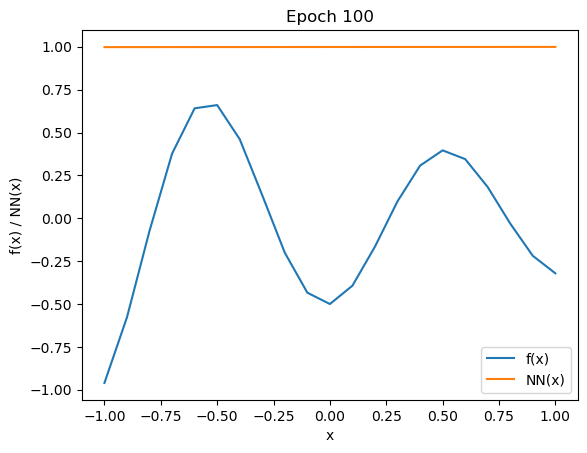

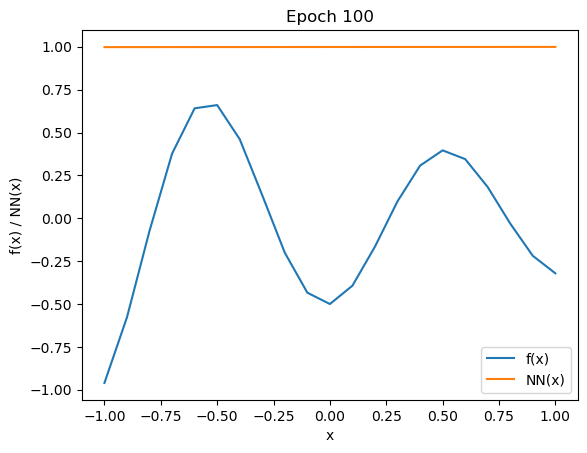

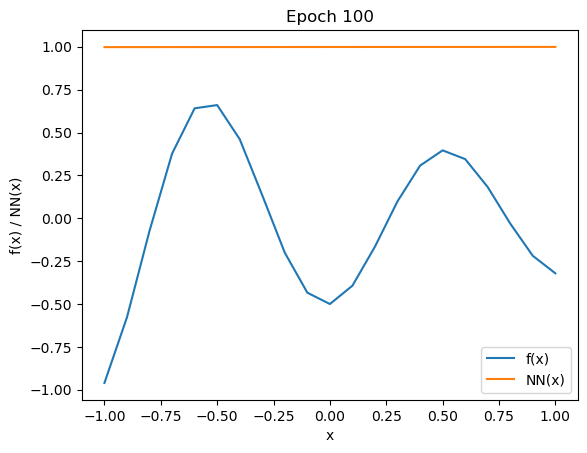

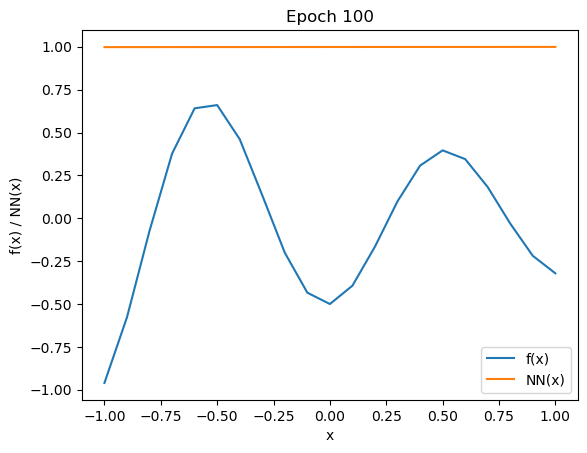

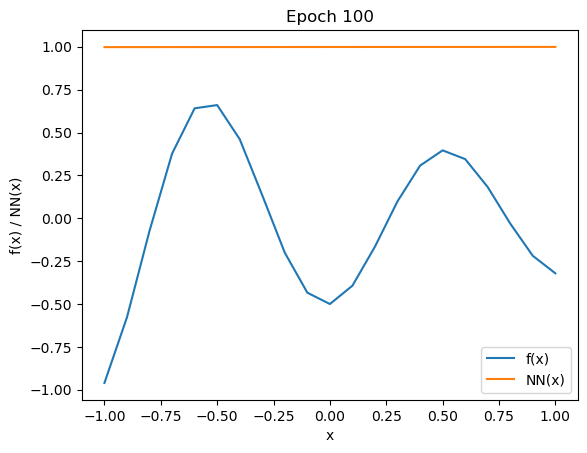

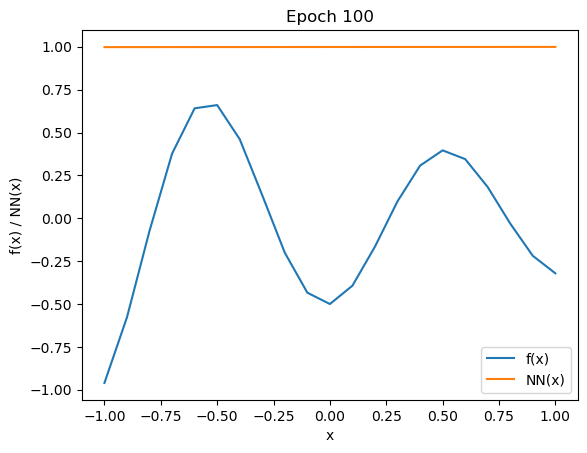

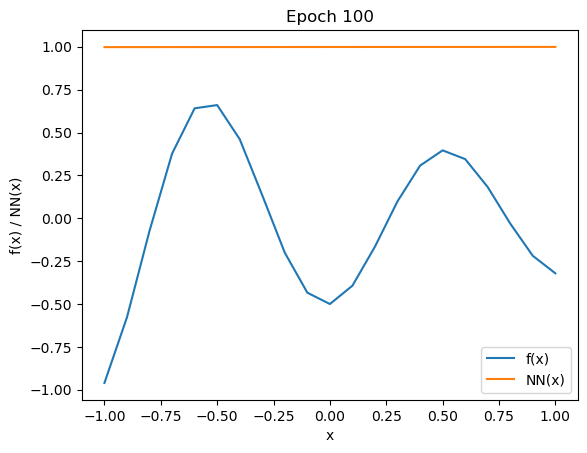

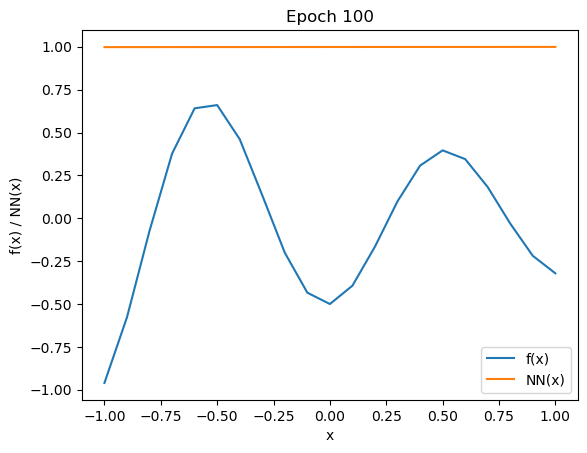

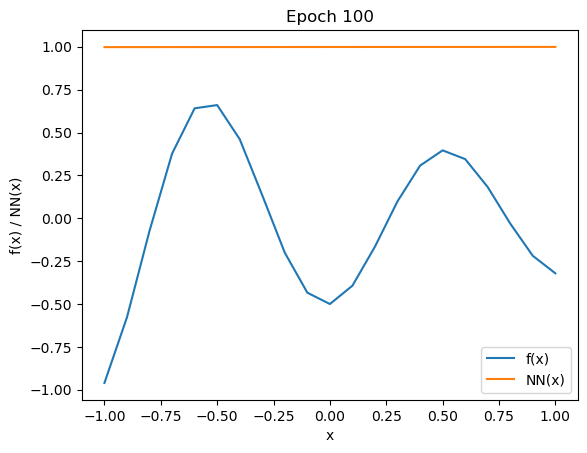

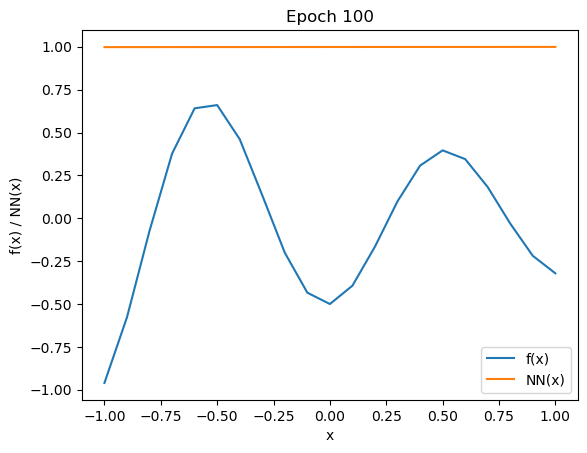

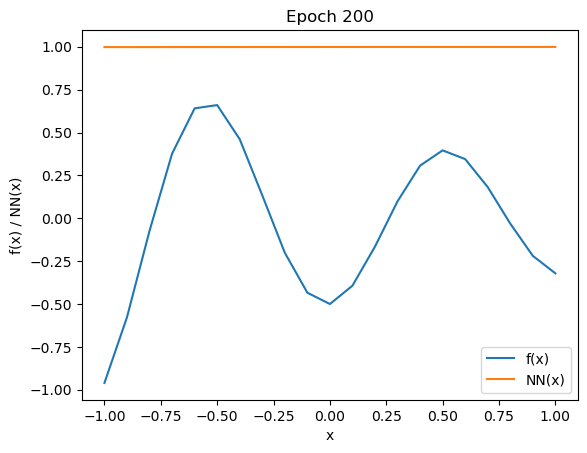

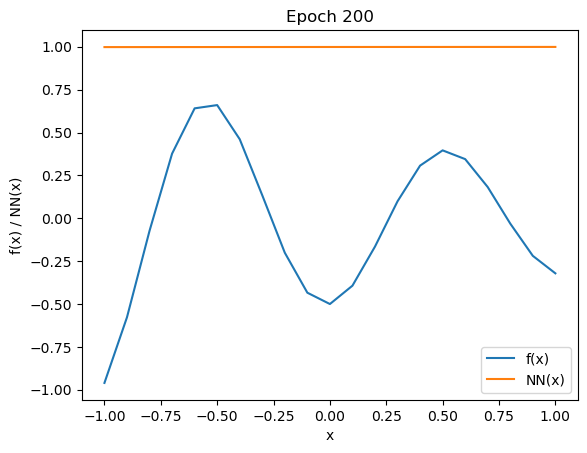

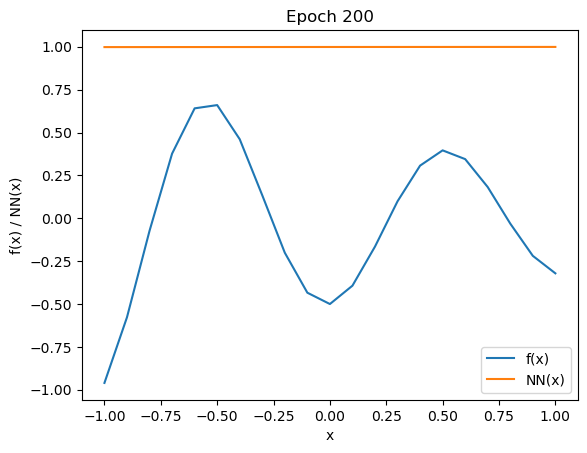

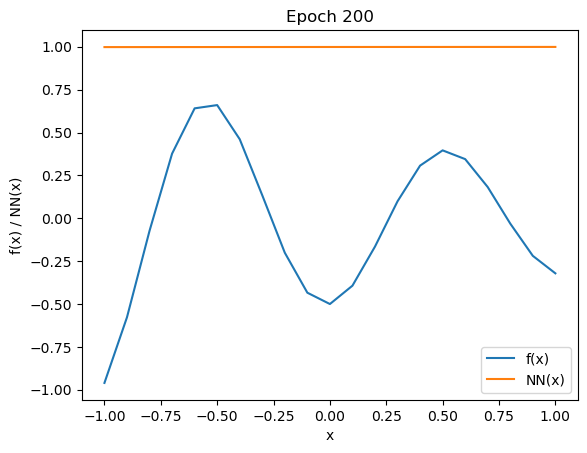

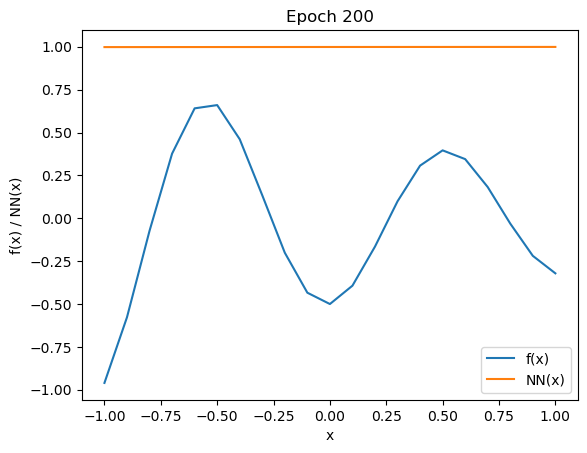

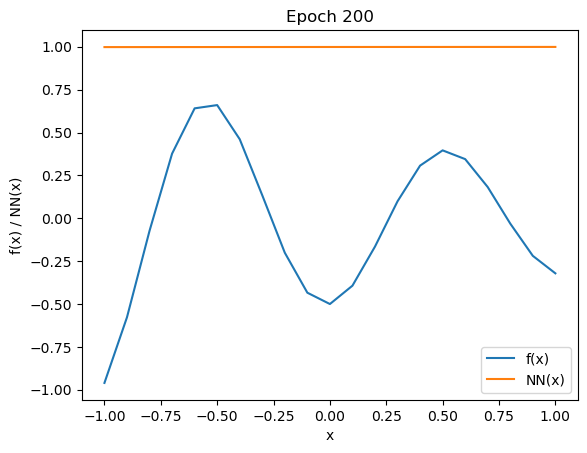

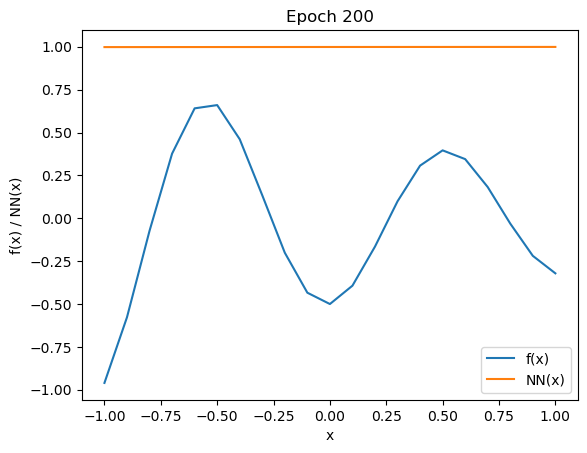

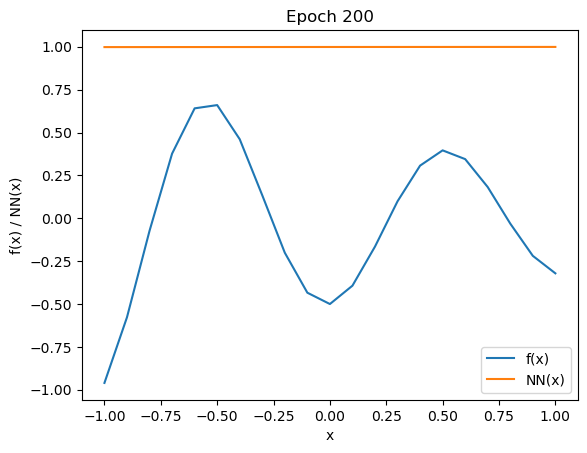

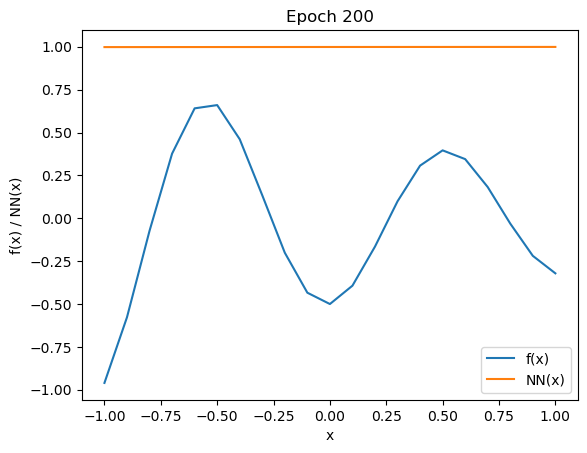

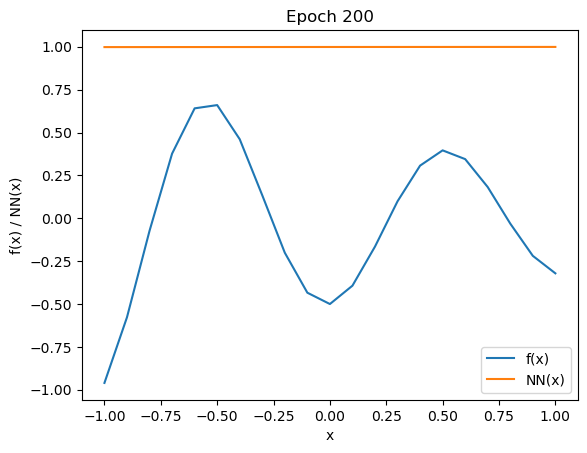

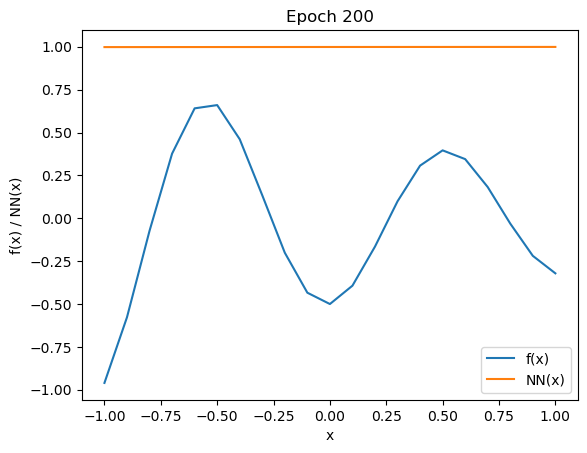

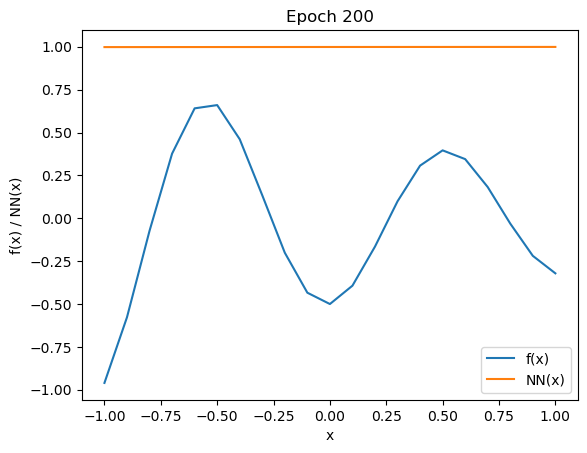

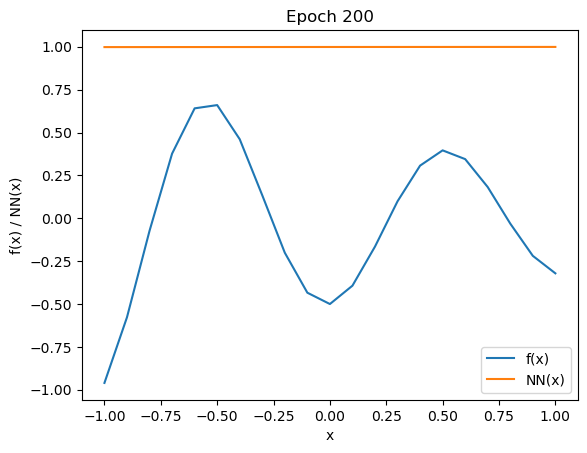

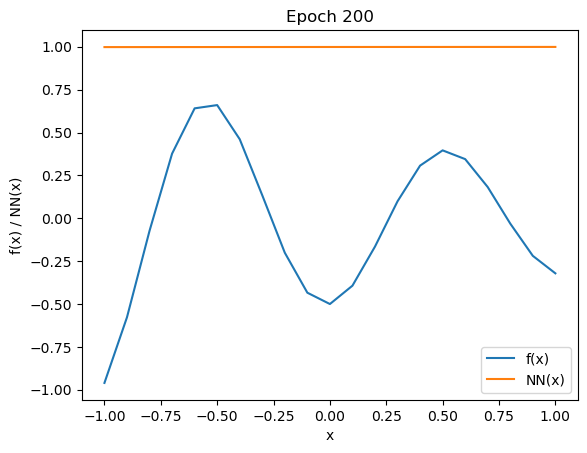

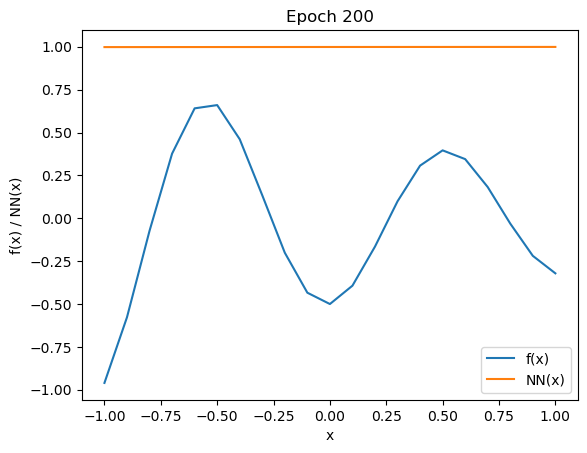

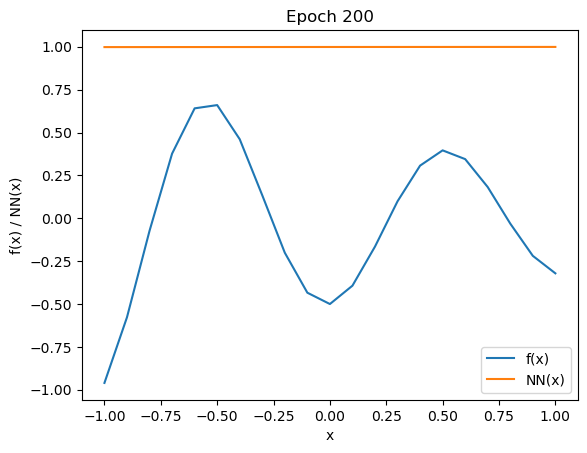

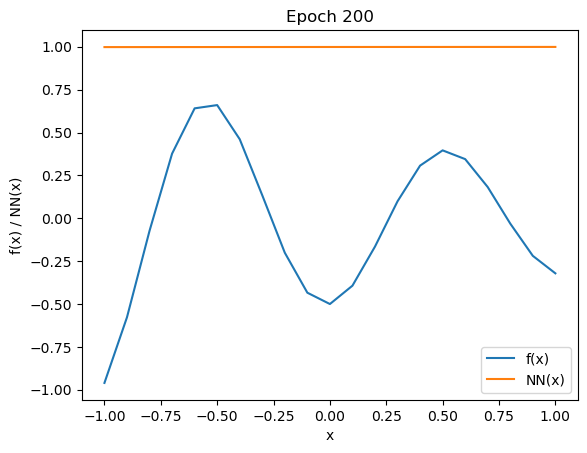

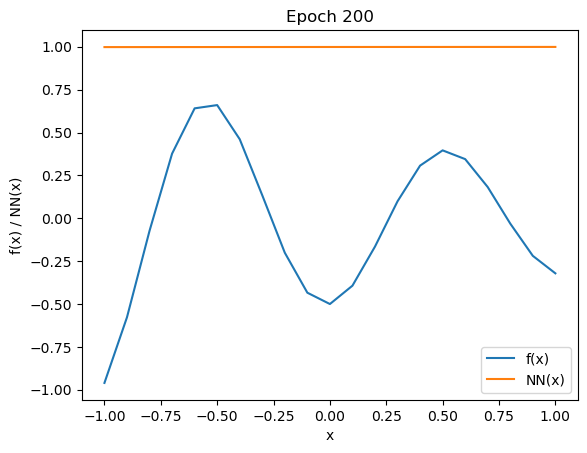

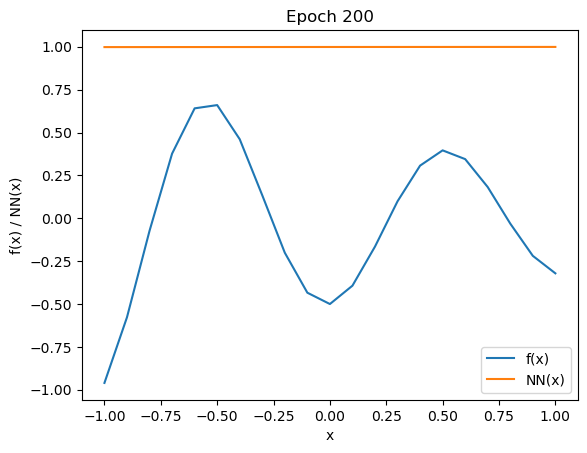

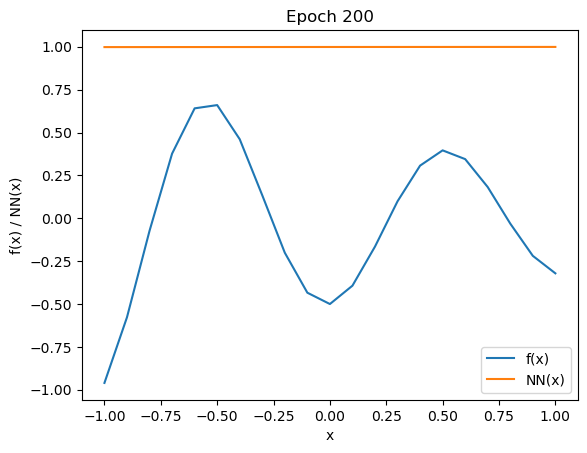

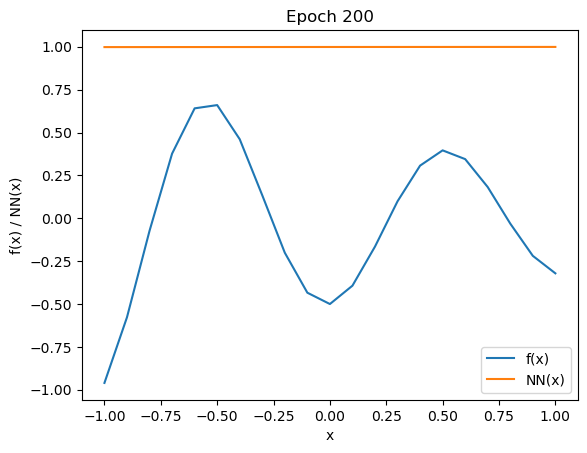

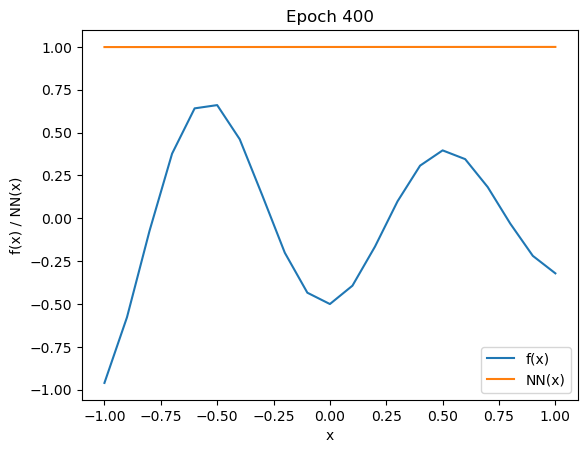

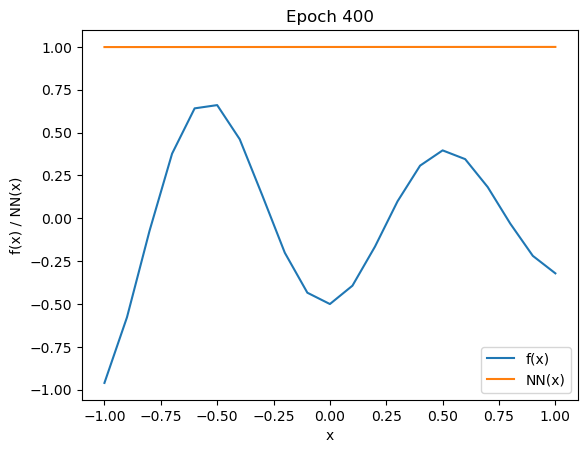

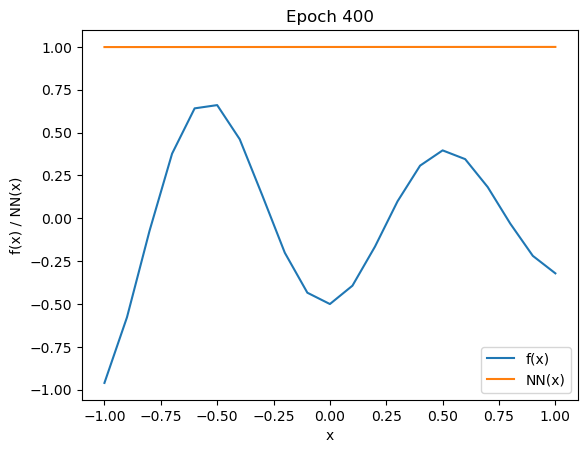

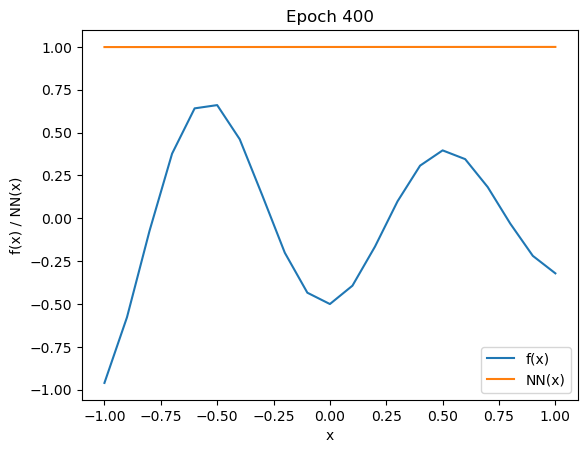

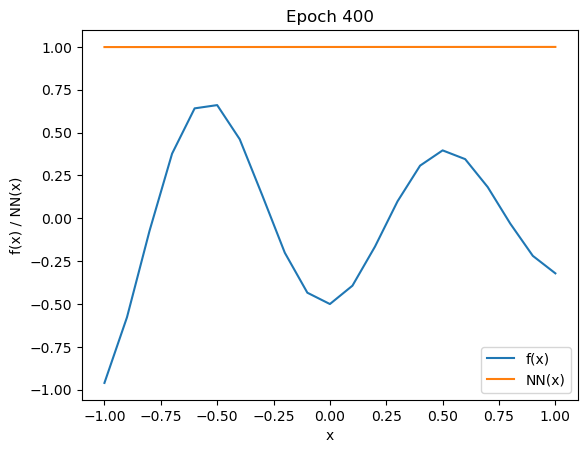

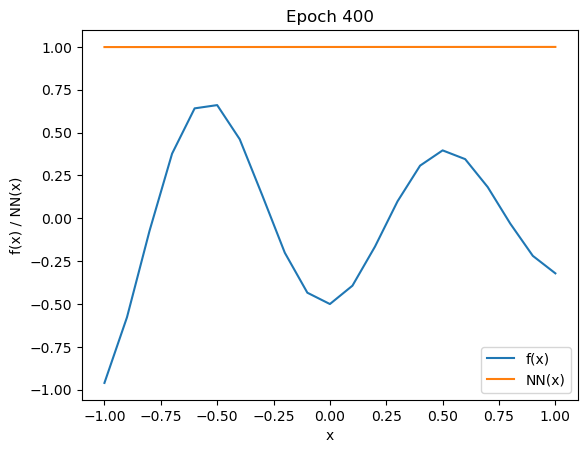

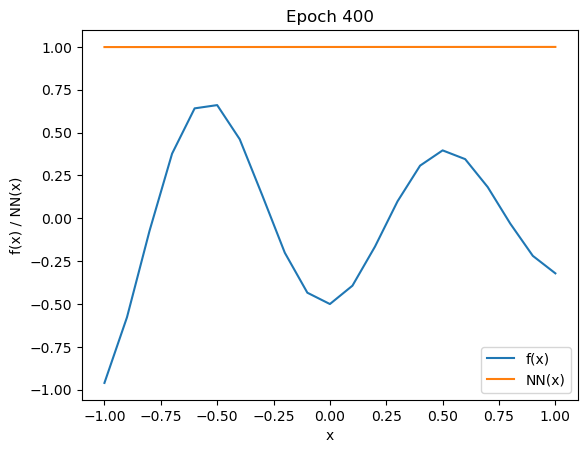

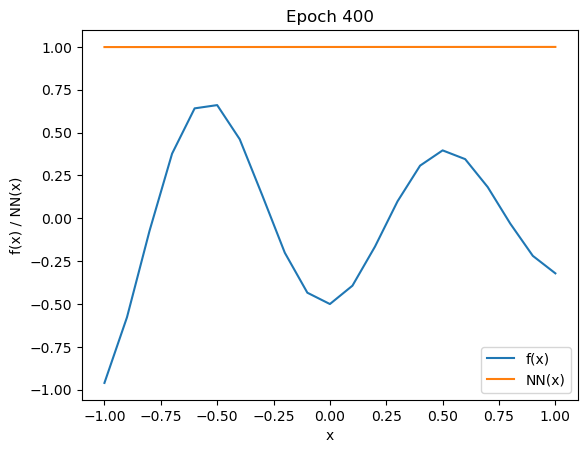

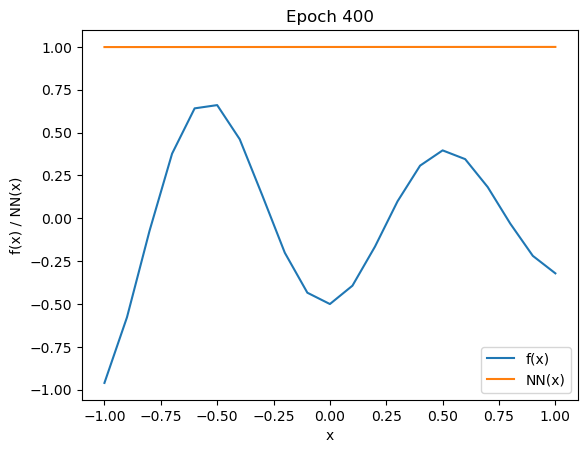

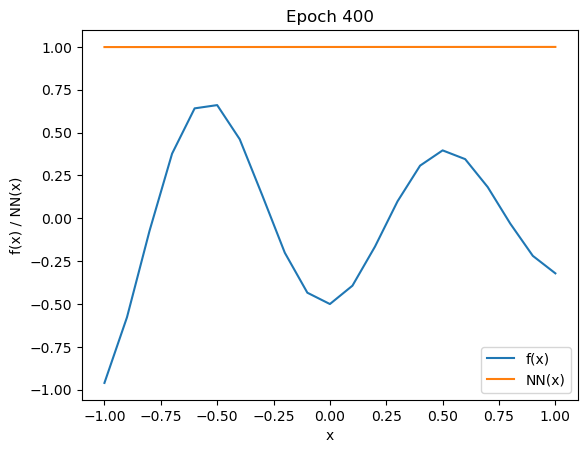

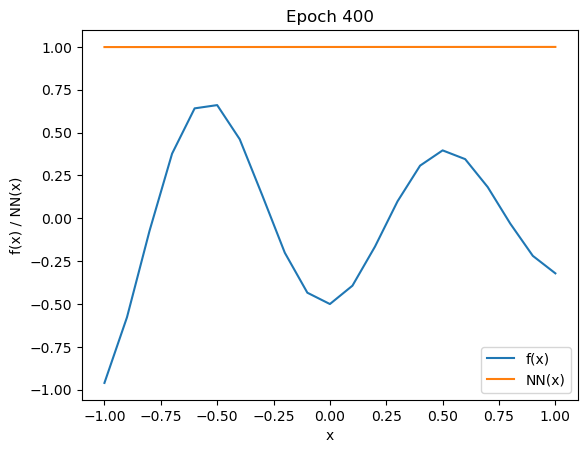

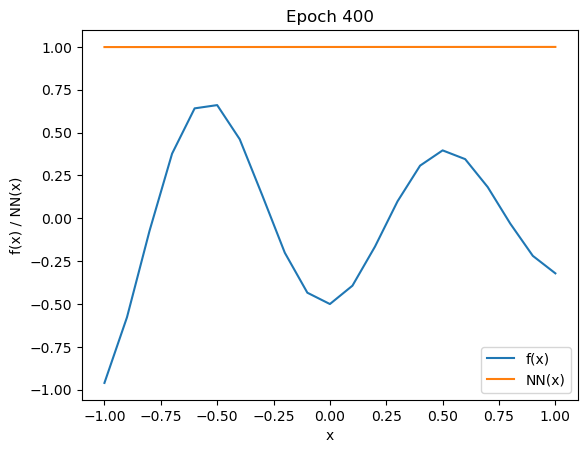

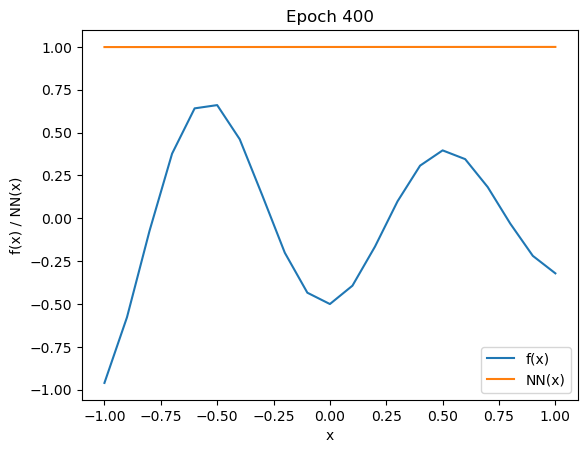

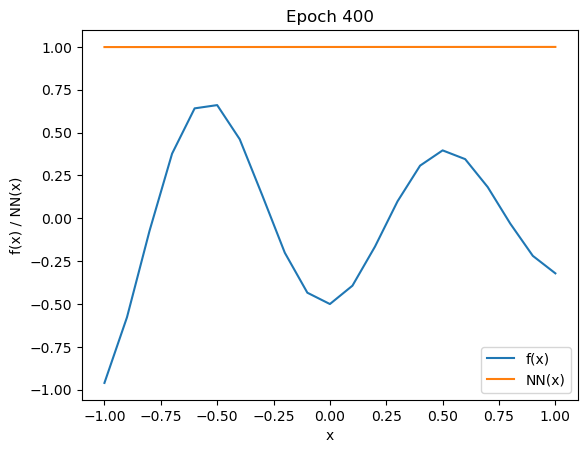

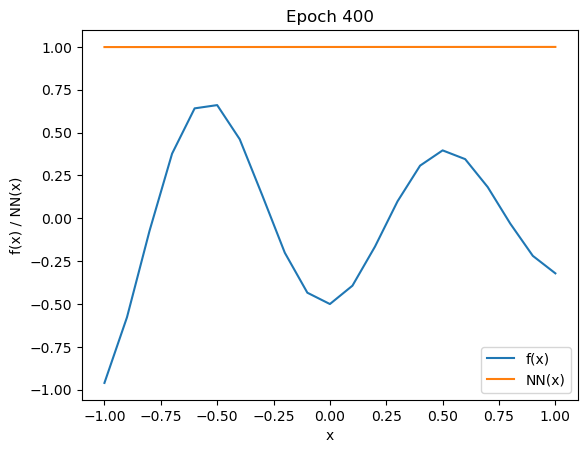

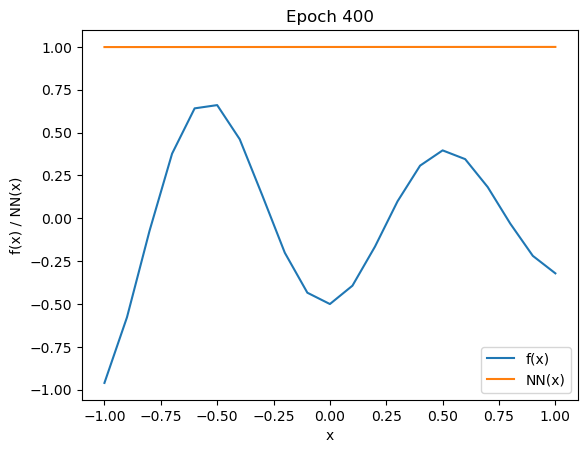

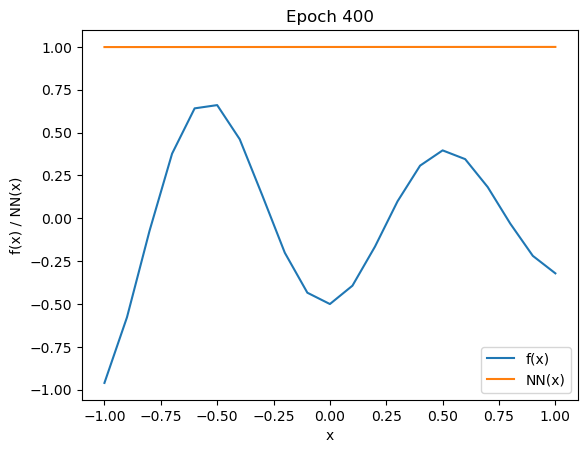

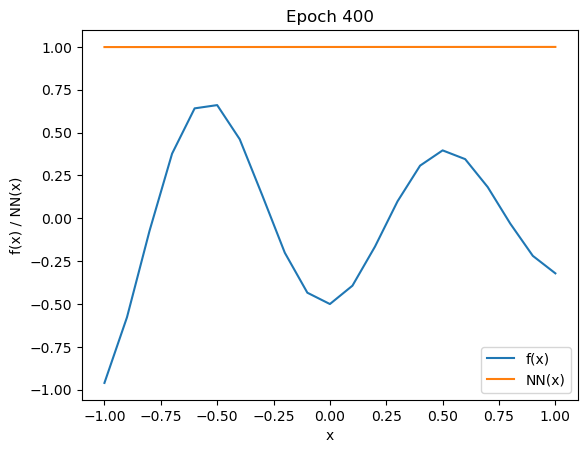

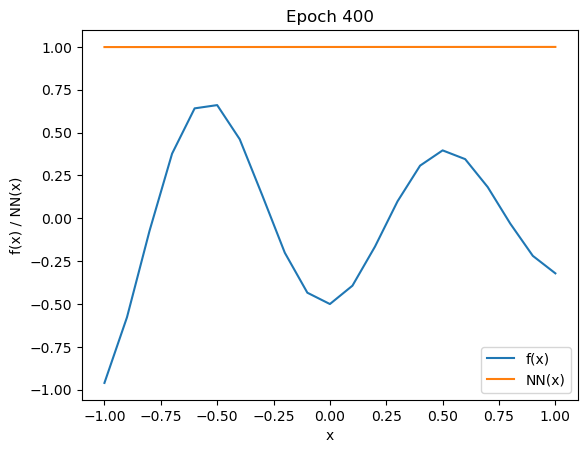

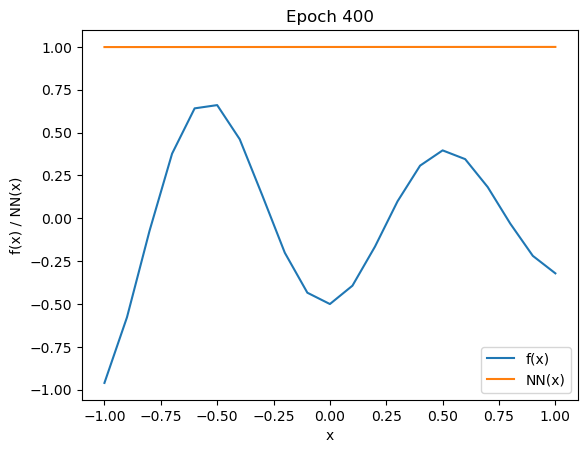

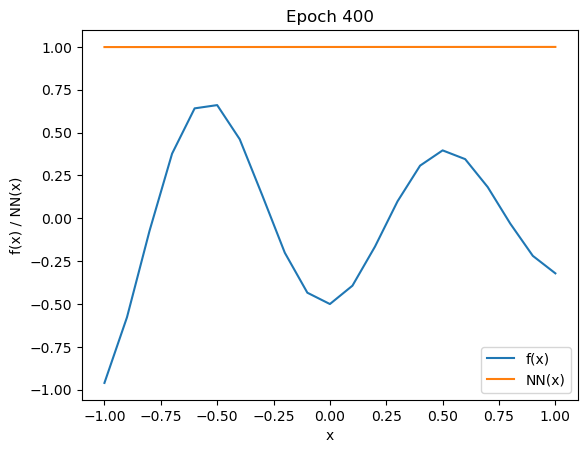

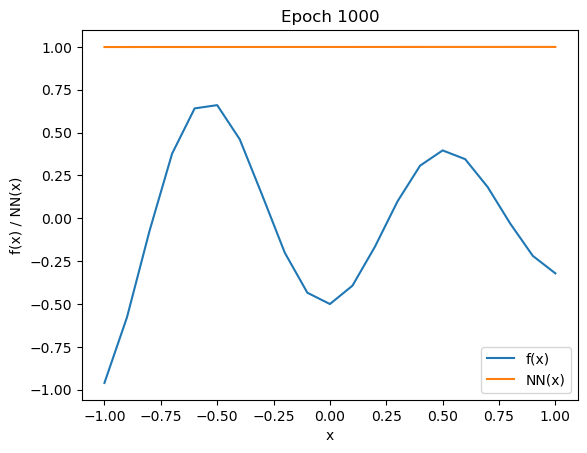

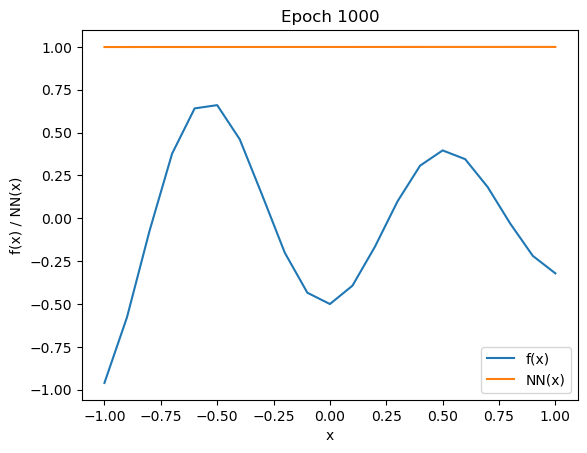

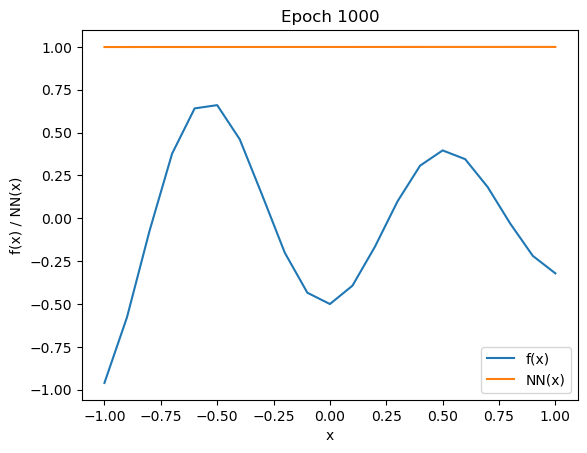

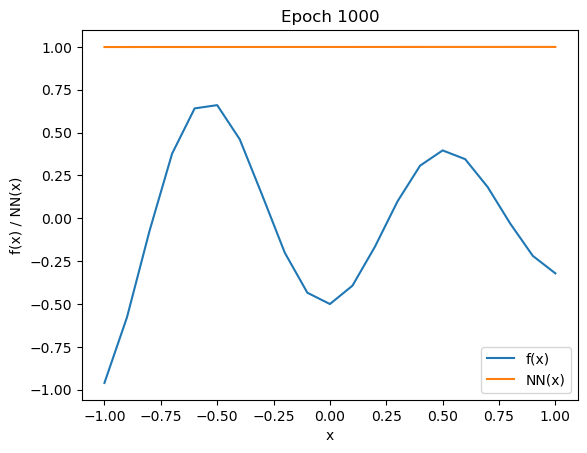

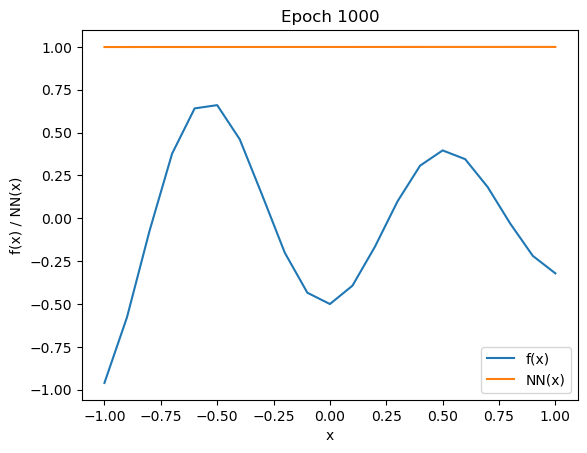

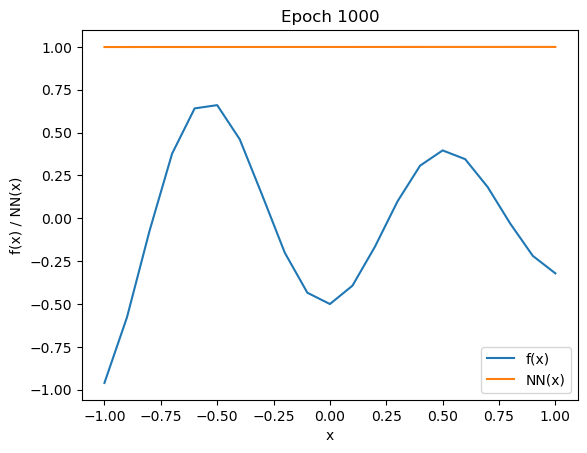

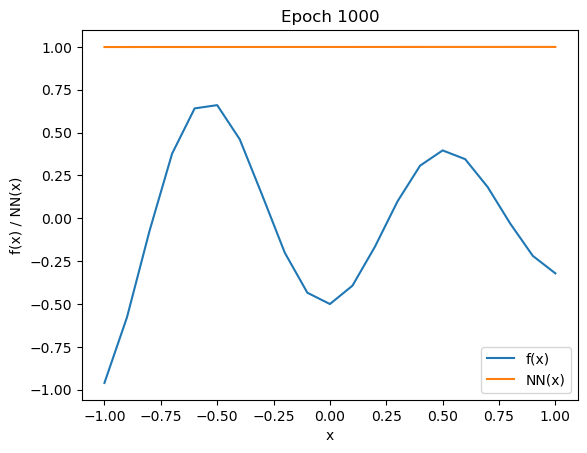

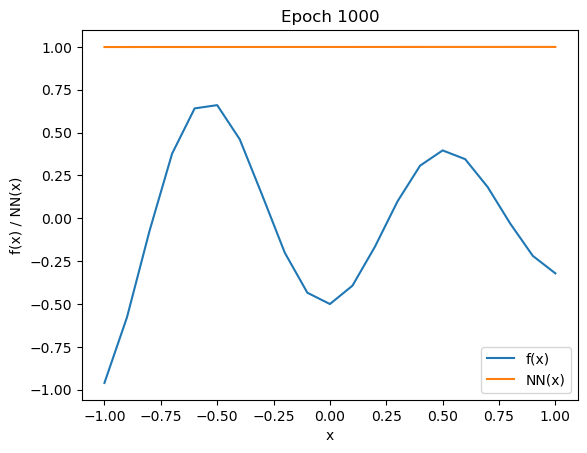

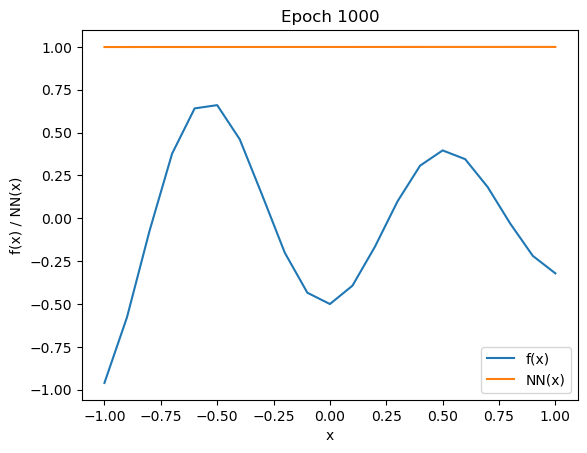

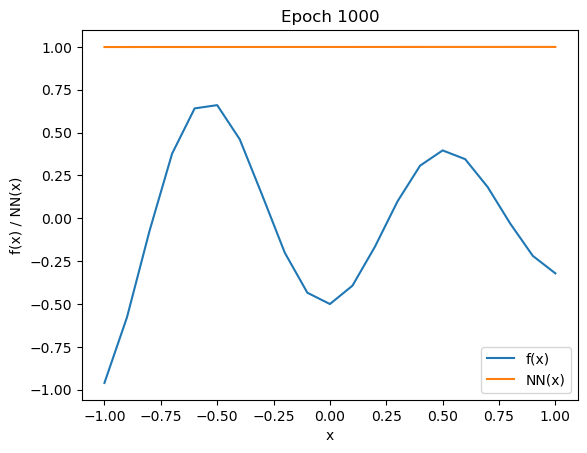

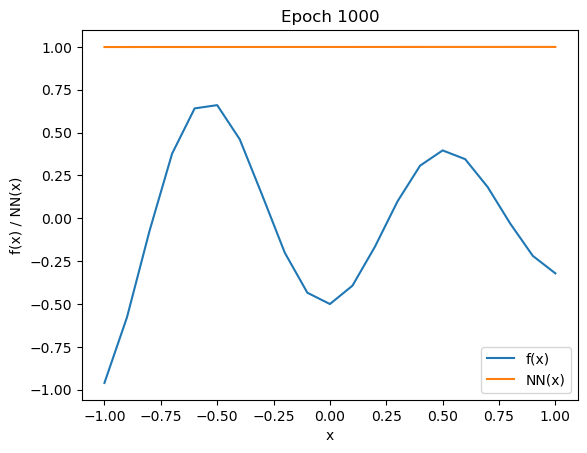

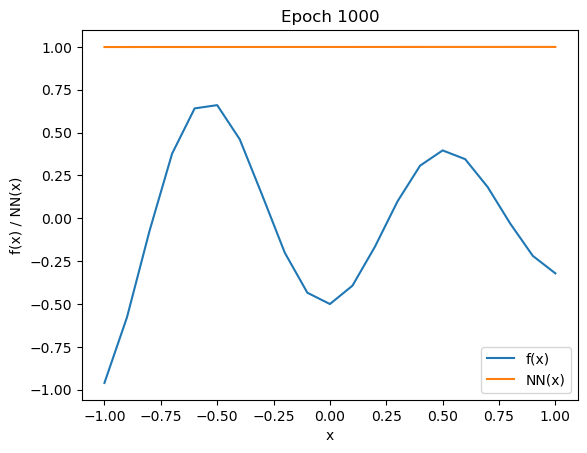

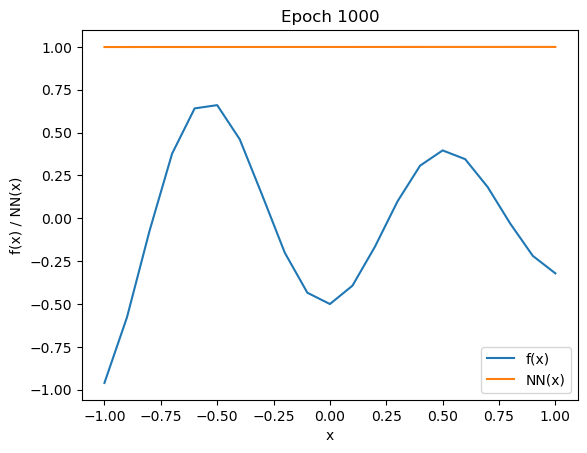

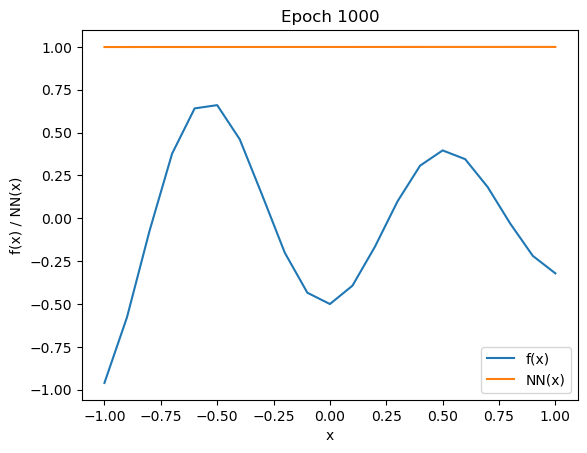

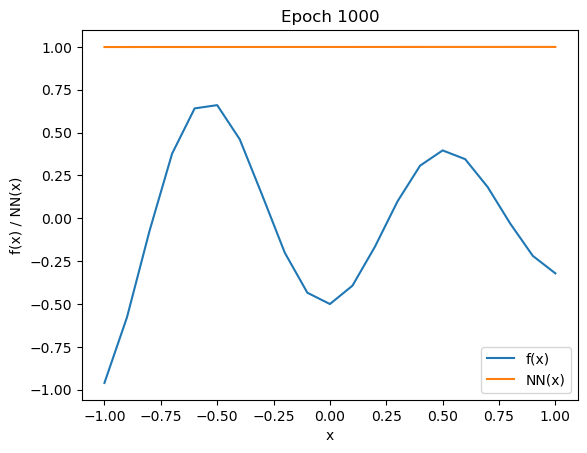

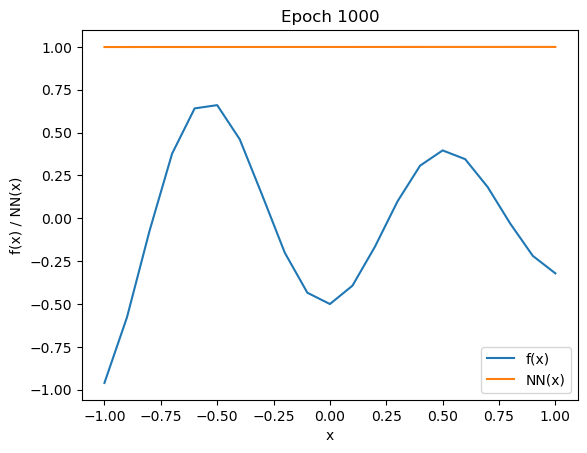

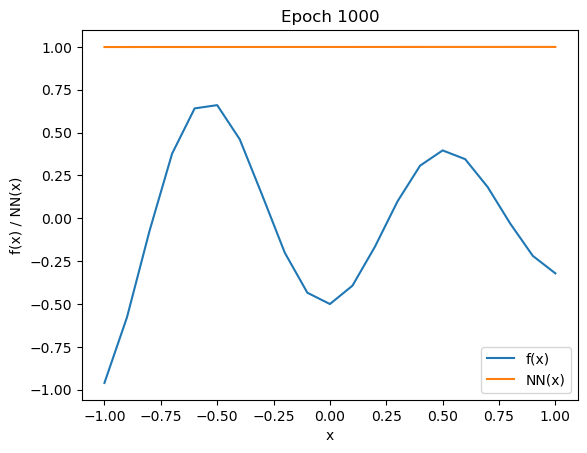

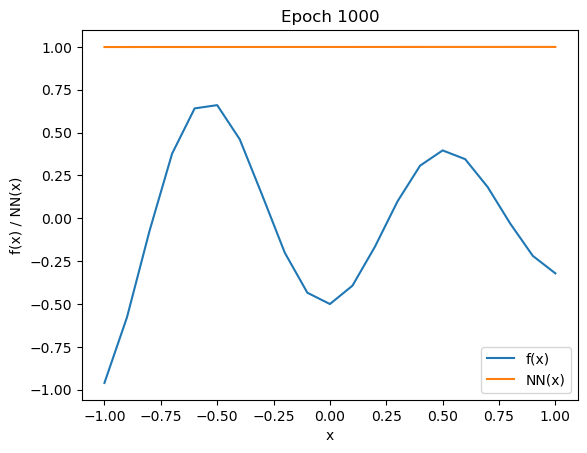

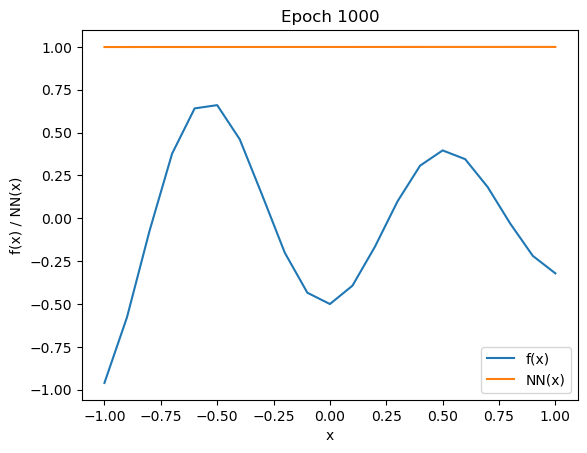

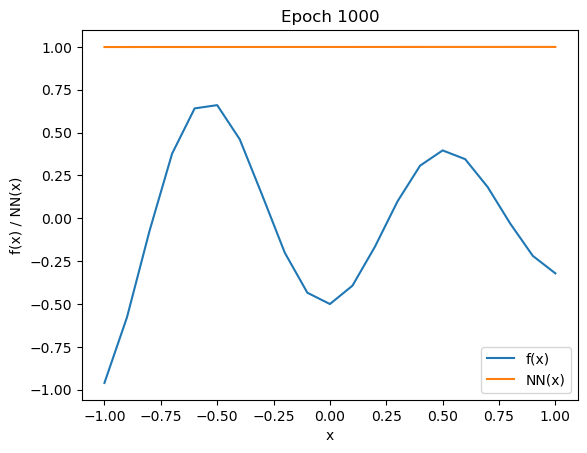

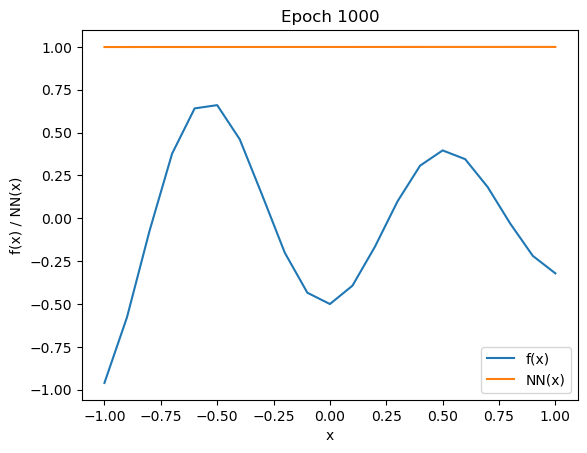

ValueError: x and y must have same first dimension, but have shapes (1000,) and (21021,)

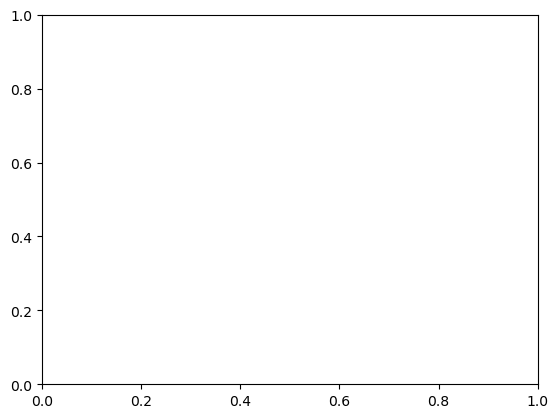

In [28]:
# Training parameters
num_epochs = 1000
errors = []

for epoch in range(num_epochs+1):
    total_error = 0
    
    for i in range(len(X)):
        inputs = X[i]
        targets = Y[i]
        hidden_output, output = forward_pass(inputs, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
        
        error = mean_squared_error(targets, output)
        total_error += error
        
        # Backpropagation
        output_error = targets-output
        output_delta = output_error * sigmoid_derivative(output)
        hidden_error = np.dot(weights_hidden_output.T, output_delta)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
        
        # update weights and biases
        weights_hidden_output -= learning_rate * np.dot(output_delta, hidden_output.T)
        biases_output -= learning_rate * output_delta
        weights_input_hidden -= learning_rate * np.dot(hidden_delta, np.array(inputs).reshape(1, -1))
        biases_hidden -= learning_rate * hidden_delta
        
        errors.append(total_error / len(X))
        
        # Plot the actual function f(x) and the neural network output NN(x) after specific epochs
        if epoch in [10, 100, 200, 400, 1000]:
            plt.figure()
            plt.title(f'Epoch {epoch}')
            plt.plot(X, Y, label='f(x)')
            nn_output = [forward_pass(x, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)[1][0] for x in X]
            plt.plot(X, nn_output, label='NN(x)')
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('f(x) / NN(x)')
            plt.show()
            
# Plot training error vs epoch number
plt.figure()
plt.plot(range(num_epochs), errors)
plt.xlabel('Epoch Number')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs. Epoch Number')
plt.show()

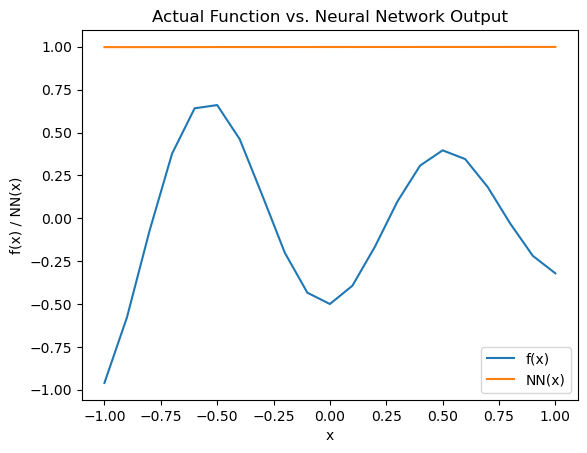

In [25]:
# # Plot training error vs epoch number
# plt.figure()
# plt.plot(range(num_epochs), errors)
# plt.xlabel('Epoch Number')
# plt.ylabel('Training Error (MSE)')
# plt.title('Training Error vs. Epoch Number')
# plt.show()

# Plot the actual function f(x) and the neural network output NN(x)
plt.figure()
plt.plot(X, Y, label='f(x)')
nn_output = [forward_pass(x, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)[1][0] for x in X]
plt.plot(X, nn_output, label='NN(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x) / NN(x)')
plt.title('Actual Function vs. Neural Network Output')
plt.show()